# 1. Problem Statement

"This is IPL's data containing 2 datasets - one gives details about the venues and players while the other captures ball-by-ball stats over 15 years of the league (2008-2022)". Here we try to get an overview of IPL in terms of teams, venues, umpires, toss decisions, winners and individual batsmen and bowlers.

# 2. Importing Packages

In [1]:
#loading packages
import numpy as np
import pandas as pd
import ydata_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

In [2]:
# 3. Loading Data

In this EDA notebook we are using two datasets about Indian Premier League.

* IPL matches dataset: This dataset contains information about the venues, players, umpires, toss decisions in 950 matches   of IPL from 2008 - 2022.
* IPL deliveries dataset: This dataset contains ball-by-ball information about 950 matches of IPL from 2008 - 2022.

# Importing 1st Dataset

In [3]:
#load data
matches = pd.read_csv("D:\matches.csv")
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


#   Description of the Dataset

* This dataset provides matches information in IPL till 2022. It gives information on teams, cities, venues, toss decisions, winners and umpires.

In [4]:
matches.shape

(950, 20)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

* info function gives us the following insights into the matches dataframe:

  * There are a total of 950 rows and 23 columns in the dataframe.

  * There are 4 columns with a numeric datatype and 19 columns with an object datatype.

  * There are missing values in the city,superover, winningteam, player_of_match,  margin,method columns.

In [6]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [7]:
# find columns with null values
null_cols = matches.columns[matches.isnull().any()]
null_cols

Index(['City', 'SuperOver', 'WinningTeam', 'Margin', 'method',
       'Player_of_Match'],
      dtype='object')

# Importing 2nd Dataset

In [8]:
#load data
deliveries = pd.read_csv("D:\deliveries.csv")
deliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


# Description of the Dataset

* This dataset provides deliveries information in IPL till 2022. It gives ball by ball details of all matches in IPL along with total runs scored by each batsman, wickets taken by each bowler and extras provided in each match.

In [9]:
deliveries.shape

(225954, 17)

In [10]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

* info function gives us the following insights into the deliveries dataframe:

    * There are a total of 22954 rows and 17 columns in the dataframe.

    * There are 9 columns with a numeric datatype and 8 columns with an object datatype.

    * There are missing values in the extra_type, player_out and kind and fielders_involved columns.

    * We will merge the 2 datasets so as to gain more insights from the data.

    * But we will work on each dataset separately and use the merged dataset when required.

In [11]:
deliveries.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [12]:
# find columns with null values
null_cols2 = deliveries.columns[deliveries.isnull().any()]
null_cols2

Index(['extra_type', 'player_out', 'kind', 'fielders_involved'], dtype='object')

# Pandas Profiling before Data Preprocessing

In [13]:
#per profiling of matches dataset
#pre_profile = matches.profile_report(title="Matches Profile before Data Preprocessing")
#pre_profile.to_file(output_file="matches_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing**

**Dataset info:**

   * Number of variables: 19
   * Number of observations: 950
   * Missing cells: 5.6%

**Variables types:**

   * Numeric = 1
   * Categorical = 17
   * Boolean = 1      
  
  
  
* city has 51 missing values.

* id is unique with no missing values.

* player_of_match has 4 missing values.

* season has a 15 distinct values 2008-2022.

* team1 and team2 have a 18 distinct values.

* toss_decision has a 2 distinct values - field and bat.

* method has a 931 missing values(98%).

* venue has a 49 distinct values.

* wonby has a 4 distinct values.


In [14]:
#pre profiling of deliveries dataset
#pre_profile2 = deliveries.profile_report(title="Deliveries Profile before Data Preprocessing")
#pre_profile2.to_file(output_file="deliveries_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing**

**Dataset info:**

   * Number of variables: 17
   * Number of observations: 225954
   * Missing cells: 22.4%

**Variables types:**

   * Numeric = 7
   * Categorical = 10
  
  
  
   * 605 distinct batsmen have played IPL so far

   * 472 distinct bowlers have bowled in IPL

   * kind column has 10 distinct values capturing the types of outs. It has 95% missing values

   * Kind column (player_dismissed)  has 95% missing values

   * extra_type has 5 distinct values 0-5 which takes into account byes,leg byes, wides, no balls and penalties

   * R Ashwin has bowled most number of overs in IPL till 2022.

   * Virat Kohli has faced most balls in IPL

   * batting_team have 14 distinct values

# 4. Data Preprocessing

* Here we will perform **Data Preprocessing** on our matches dataset first, to make the data usable for **EDA.**

In [15]:
matches.head() 

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


From Pre profiling, we found that:

   * city has missing values

   * city has 33 distinct values while venue has 49 distinct values
   
   * player_of_match has 4 missing value(may be match was abandoned)

Will take each of the above observations and work on them to make the data ready for EDA

In [16]:
#Filling in the missing values of city column
#First let's find the venues corresponding to which the values of city are empty

matches[matches.City.isnull()][['City','Venue']]

,City,Venue
134,NaN,Dubai International Cricket Stadium
137,NaN,Dubai International Cricket Stadium
138,NaN,Sharjah Cricket Stadium
140,NaN,Dubai International Cricket Stadium
142,NaN,Dubai International Cricket Stadium
143,NaN,Sharjah Cricket Stadium
145,NaN,Dubai International Cricket Stadium
147,NaN,Dubai International Cricket Stadium
148,NaN,Sharjah Cricket Stadium
150,NaN,Dubai International Cricket Stadium


In [17]:
#City values are empty for venue = Dubai International Cricket Stadium, Sharjah cricket stadium
#So, missing values can be filled with Dubai, sharjah

In [18]:
matches.loc[matches['Venue'] == 'Dubai International Cricket Stadium', 'City'] = 'Dubai'
matches.loc[matches['Venue'] == 'Sharjah Cricket Stadium', 'City'] = 'Sharjah'

There are no more missing values in city column

In [19]:
#Player of match has 4 missing values. 
#Let's see this based on result column to find why it is empty

matches[matches.Player_of_Match.isnull()][['Player_of_Match','WinningTeam']]

,Player_of_Match,WinningTeam
205,NaN,NaN
437,NaN,NaN
464,NaN,NaN
708,NaN,NaN


This shows when there was no result(may be match was abandoned) then there was no player_of_match which makes sense

In [20]:
""" method column has missing values.There is very low instances where matches decided by D/L method.so value contains null 
means match is done by normal. so we replace null values by 'Normal' """ 

matches["method"].fillna("Normal", inplace=True)

In [21]:
matches["method"].value_counts()

Normal    931
D/L        19
Name: method, dtype: int64

In [22]:
matches.WinningTeam.value_counts()

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: WinningTeam, dtype: int64

team1, team2 and winner all 3 columns have rising pune supergiant as well as rising pune supergiants. so we can just keep one of the names

In [23]:
matches['WinningTeam'] = matches['WinningTeam'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['Team1'] = matches['Team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['Team2'] = matches['Team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

Delhi daredevils and delhi capitals are same team so we can keep just one of the names,same for punjab.

In [24]:
matches['WinningTeam'] = matches['WinningTeam'].replace('Delhi Daredevils','Delhi Capitals')
matches['Team1'] = matches['Team1'].replace('Delhi Daredevils','Delhi Capitals')
matches['Team2'] = matches['Team2'].replace('Delhi Daredevils','Delhi Capitals')

matches['WinningTeam'] = matches['WinningTeam'].replace('Kings XI Punjab','Punjab Kings')
matches['Team1'] = matches['Team1'].replace('Kings XI Punjab','Punjab Kings')
matches['Team2'] = matches['Team2'].replace('Kings XI Punjab','Punjab Kings')

In [25]:
matches.WinningTeam.value_counts()

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Delhi Capitals                 103
Punjab Kings                   101
Rajasthan Royals                96
Sunrisers Hyderabad             75
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Gujarat Titans                  12
Pune Warriors                   12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

In [26]:
#city has 33 distinct values while we have 49 venues.
#Let's find out venues grouped by cities to see which cities have multiple venues

In [27]:
city_venue = matches.groupby(['City','Venue']).count()['Season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

Season
City           Venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                    29
               Zayed Cricket Stadium, Abu Dhabi                         8
Ahmedabad      Narendra Modi Stadium, Ahmedabad                         7
               Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   65
Bengaluru      M.Chinnaswamy Stadium                                   15
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium            10
               Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        MA Chidambaram Stadium                                   9
               MA Chidambaram Stadium, Chepauk                         48
               MA Chidambaram Stadium, Chepauk, Chennai                10
Cuttack        Barabati Stadium                                         7
Delhi          Arun Jaitley Stadium                                    14
               Arun Jaitley Stadium, Delhi                              4
               Feroz Shah Kotla                                        60
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                     46
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium                      15
               Rajiv Gandhi International Stadium, Uppal               49
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
               Eden Gardens, Kolkata                                    2
Mumbai         Brabourne Stadium                                       10
               Brabourne Stadium, Mumbai                               17
               Dr DY Patil Sports Academy                              17
               Dr DY Patil Sports Academy, Mumbai                      11
               Wankhede Stadium                                        73
               Wankhede Stadium, Mumbai                                31
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Navi Mumbai    Dr DY Patil Sports Academy, Mumbai                       9
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 22
               Maharashtra Cricket Association Stadium, Pune           13
               Subrata Roy Sahara Stadium                              16
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                 28
Visakhapatnam  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      13

Observations

  * Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them
  * Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium there
  * Mumbai has 3 stadiums/venues used for IPL
  * Pune has 2 venues for IPL

In [28]:
city_replacement={'Bangalore':'Bengaluru',
                 'Navi Mumbai':'Mumbai',
                 'Chandigarh':'Mohali'}


matches['City'] = matches['City'].replace(city_replacement)

In [29]:
venue_replacements = {'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
                      'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad',
                      'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chepauk', 
                      'MA Chidambaram Stadium, Chepauk, Chennai':'MA Chidambaram Stadium, Chepauk',
                     'Feroz Shah Kotla':'Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium':'Arun Jaitley Stadium, Delhi',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                     'Eden Gardens, Kolkata':'Eden Gardens',
                    'Punjab Cricket Association IS Bindra Stadium':'Punjab Cricket Association Stadium, Mohali',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium, Mohali',
                    'Brabourne Stadium':'Brabourne Stadium, Mumbai',
                      'Dr DY Patil Sports Academy':'Dr DY Patil Sports Academy, Mumbai',
                     'Wankhede Stadium, Mumbai':'Wankhede Stadium',
                     'Maharashtra Cricket Association Stadium, Pune':'Maharashtra Cricket Association Stadium',
                    'Zayed Cricket Stadium, Abu Dhabi':'Sheikh Zayed Stadium' }

# Replace the values in the 'Venue' column
matches['Venue'] = matches['Venue'].replace(venue_replacements)


In [30]:
city_venue = matches.groupby(['City','Venue']).count()['Season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

,,Season
City,Venue,
Abu Dhabi,Sheikh Zayed Stadium,37
Ahmedabad,"Narendra Modi Stadium, Ahmedabad",19
Bengaluru,M Chinnaswamy Stadium,80
Bloemfontein,OUTsurance Oval,2
Cape Town,Newlands,7
Centurion,SuperSport Park,12
Chennai,"MA Chidambaram Stadium, Chepauk",67
Cuttack,Barabati Stadium,7
Delhi,"Arun Jaitley Stadium, Delhi",78


In [31]:
print(matches.City.nunique())
print(matches.Venue.nunique())

31
34


In [32]:
# create a new column 'result' with updated values
matches['Result'] = matches['WonBy'].replace({'Runs': 'normal', 'Wickets': 'normal'})

# leave 'superover' and 'noresult' values as they are

# create two new columns 'win_by_runs' and 'win_by_wickets' 
matches['win_by_runs'] = 0
matches['win_by_wickets'] = 0

# update 'win_by_runs' and 'win_by_wickets' based on 'won_by' and 'margin' columns
matches.loc[matches['WonBy'] == 'Runs', 'win_by_runs'] = matches['Margin']
matches.loc[matches['WonBy'] == 'Wickets', 'win_by_wickets'] = matches['Margin']

# leave 'superover' and 'noresult' values as zero
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Result,win_by_runs,win_by_wickets
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,7.0,Normal,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,normal,0,7
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,7.0,Normal,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,normal,0,7
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,...,14.0,Normal,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,normal,14,0
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,...,7.0,Normal,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,normal,0,7
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,...,5.0,Normal,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,normal,0,5


In [33]:
matches.Season.value_counts()

2013       76
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: Season, dtype: int64

In [34]:
replace_season_year = {"2020/21": "2020", "2009/10": "2010", "2007/08": "2008"}
matches["Season"] = matches["Season"].replace(replace_season_year)

In [35]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             950 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           950 non-null    object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [36]:
#Convert date column to datetime dtype
#matches['Date'] = pd.to_datetime(matches['Date'])
matches['Season']=pd.to_numeric(matches['Season'],errors='coerce')


* Here we will perform Data Preprocessing on our **deliveries** dataset first, to make the data usable for EDA.

# 4.2 Pandas Profiling after Data Preprocessing

* Here, we will perform **Pandas Profiling after preprocessing** our matches dataset

In [37]:
#post_profile = matches.profile_report(title="Matches Profile after Data Preprocessing")
#post_profile.to_file(output_file="matches_profiling_after_preprocessing.html")

**Observations from Pandas Profiling before Data Processing**

**Dataset info:**

  * Number of variables: 21
  * Number of observations: 950
  * Missing cells: 0.2%

Variables types:

  * Numeric = 3
  * Categorical = 17
  * Boolean = 1  
  
  
  * city has no missing values now and has 31 distinct values.

  * player_of_match has 4 missing values as we have not filled in because it can not be done as 4 matches were abaondoned. But this will not hamper our analysis.

  * WonBy column has 4 distinct values wickets, runs, superover and no result.

  * season has a 15 distinct values 2008-2022.

  * team1 and team2 have a 16 distinct values.

  * toss_decision has a 2 distinct values - field and bat.

  * umpire1 and umpire2 have no missing value.

  * venue has a 34 distinct values.

  * WinningTeam now has a 16 distinct values in line with team1 and team2 columns



Here, we will perform **Pandas Profiling after preprocessing** on our deliveries dataset

In [38]:
#post_profile = deliveries.profile_report(title="Deliveries Profile after Data Preprocessing")
#post_profile.to_file(output_file="deliveries_profiling_after_preprocessing.html")

**Observations from Pandas Profiling before Data Processing**

**Dataset info:**

Number of variables: 17
Number of observations: 225954
Missing cells: 22.4%

**Variables types:**

Numeric = 7
Categorical = 10

  * 605 distinct batsmen have played IPL so far

  * 472 distinct bowlers have bowled in IPL

  * kind (dismissal_kind) column has 10 distinct values capturing the types of outs. It has 95% missing values

  * player_out column has 95% missing values

  * extra_type has 5 distinct values 0-5 which takes into account byes,leg byes, wides, no balls and penalties

  * R ashwin has bowled most number of overs in IPL till 2022.

  * Virat Kohli has faced most balls in IPL

In [39]:
#merging the 2 datasets
merge_df = pd.merge(deliveries,matches, left_on='ID', right_on ='ID')
merge_df.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Result,win_by_runs,win_by_wickets
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,7.0,Normal,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,normal,0,7
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,7.0,Normal,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,normal,0,7


* info function gives us the following insights into the merge_df dataframe:

    * There are a total of 225954 rows and 36 columns in the dataframe now.

    * There are 10 columns with a numeric datatype and 26 columns with an object datatype.

    * There are missing values in the extra_type, player_out , kind , fielders_involved, city,superover, winningteam, player_of_match, margin and method column

# 5. Exploratory Data Analysis

Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

Here we will first start by analysing individual columns that is do univariate analysis and then move on to bivariate and multivariate analysis. In the course of this we will try to answer few questions that will tell us more about each venue, toss winner, individual players, umpires, etc.

# 5.1 Univariate Analysis on Matches Data

Here we are first doing univariate analysis on matches data

### 5.1.1 How many matches were played each season?

In [40]:
matches.Season.value_counts()

2013    76
2022    74
2012    74
2011    73
2021    60
2020    60
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: Season, dtype: int64

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

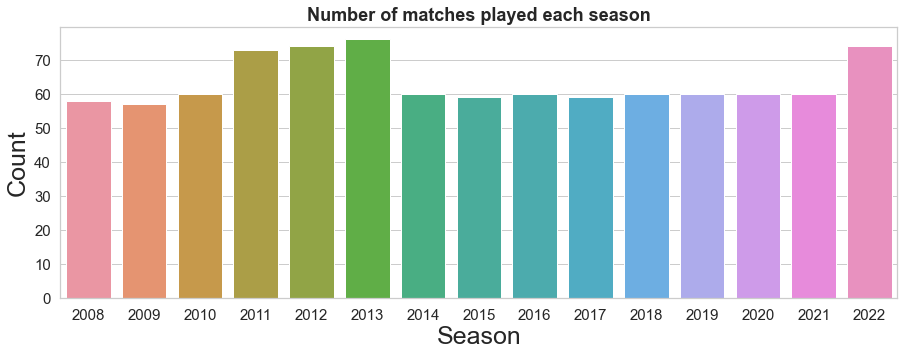

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x='Season', data=matches)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

  * 2011,2012,2013,2022 have more matches being played than other seasons


  * All other seasons have approximately 58-60 matches while 2011,2012,2013,2022 have more than 70 matches.


  * Let's find out the reason for this

### 5.1.2 How many teams played in each season?

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

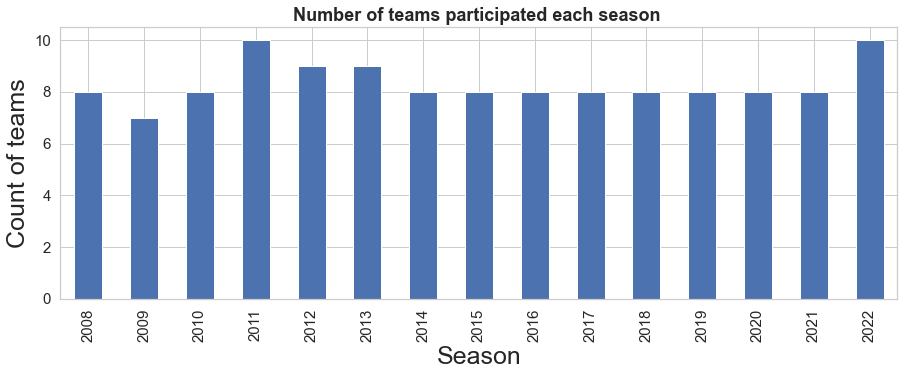

In [42]:
matches.groupby('Season')['Team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

  * 10 teams played in 2011 & 2022 and 9 teams each in 2012 and 2013


  * This explains why 2011,2012,2013,2022 have seen more matches being played than other seasons

### 5.1.3 Which team has dominated IPL so far?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Gujarat Titans'),
  Text(0, 4, 'Sunrisers Hyderabad'),
  Text(0, 5, 'Deccan Chargers'),
  Text(0, 6, 'Rajasthan Royals')])

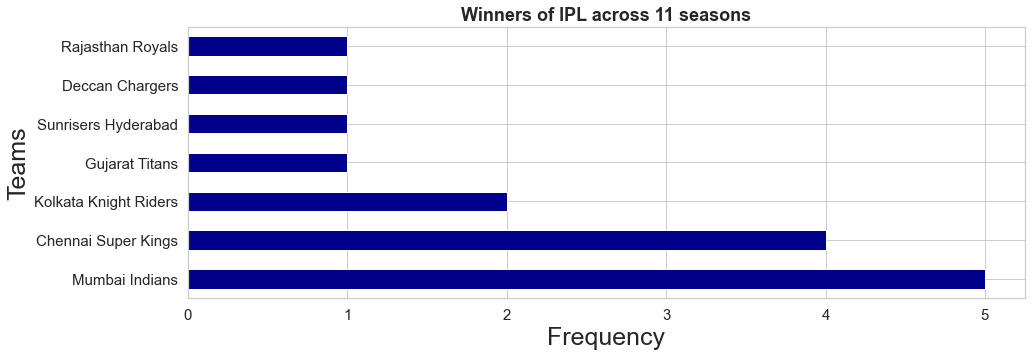

In [43]:
final_matches = matches[matches['MatchNumber'] == 'Final']
title_counts = final_matches['WinningTeam'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

  * MI and CSK have won 5 and 4 times respectively followed by KKR who has won 2 times.
  * Actually Hyderabad team has also won 2 matches under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad

### 5.1.4 Venue which has hosted most number of IPL matches?

In [44]:
matches.Venue.value_counts().sort_values(ascending = False)

Wankhede Stadium                                       104
M Chinnaswamy Stadium                                   80
Eden Gardens                                            79
Arun Jaitley Stadium, Delhi                             78
MA Chidambaram Stadium, Chepauk                         67
Rajiv Gandhi International Stadium                      64
Punjab Cricket Association Stadium, Mohali              56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Sheikh Zayed Stadium                                    37
Dr DY Patil Sports Academy, Mumbai                      37
Maharashtra Cricket Association Stadium                 35
Sharjah Cricket Stadium                                 28
Brabourne Stadium, Mumbai                               27
Narendra Modi Stadium, Ahmedabad                        19
Subrata Roy Sahara Stadium                              16
Kingsmead                                               

Text(0.5, 0, 'Frequency')

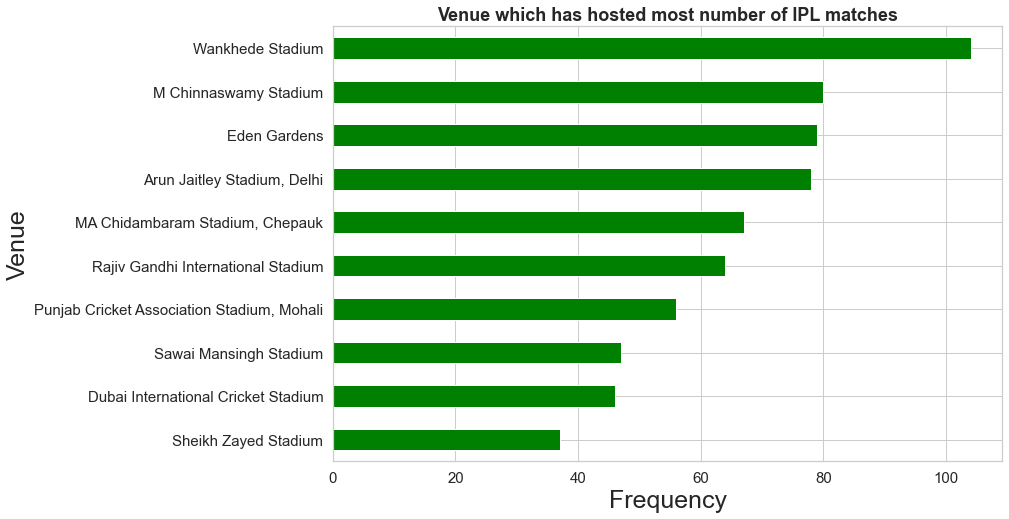

In [45]:
matches.Venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='green')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)

  * **Wankhede Stadium in Mumbai** has hosted the highest number of matches so far in IPL followed by **M Chinnaswamy Stadium in Bengaluru**

### 5.1.5 Umpires who have appeared in most number of matches?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'S Ravi'),
  Text(0, 1, 'AK Chaudhary'),
  Text(0, 2, 'HDPK Dharmasena'),
  Text(0, 3, 'C Shamshuddin'),
  Text(0, 4, 'Nitin Menon'),
  Text(0, 5, 'CB Gaffaney'),
  Text(0, 6, 'M Erasmus'),
  Text(0, 7, 'CK Nandan'),
  Text(0, 8, 'BNJ Oxenford'),
  Text(0, 9, 'KN Ananthapadmanabhan')])

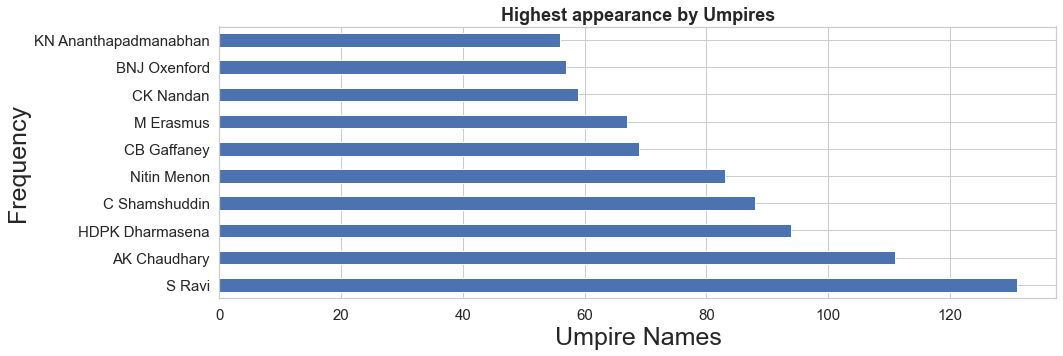

In [46]:
#A simple concatenation of 2 umpire columns will give us the total number of matches that each umpire has umpired
umpire_total = pd.concat([matches.Umpire1,matches.Umpire2], ignore_index=True)
umpire_total = pd.DataFrame(umpire_total, columns = ['umpire_name'])

umpire_total['umpire_name'].value_counts().head(10).plot(kind = 'barh', figsize = (15,5))
plt.title("Highest appearance by Umpires",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Umpire Names", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

  * **S Ravi** has appeared in most IPL matches (close to 130)

### 5.1.6 Do teams bat first or second after winning toss?

In [47]:
matches.TossDecision.value_counts()/len(matches)*100

field    63.052632
bat      36.947368
Name: TossDecision, dtype: float64

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

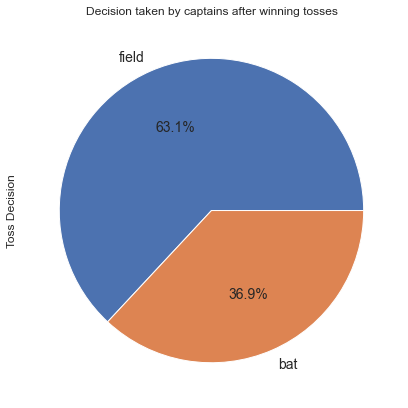

In [48]:
matches['TossDecision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', figsize=(10,7))

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

  * Close to 63% times teams who have won tosses have decided to chase down

### 5.1.7 Do teams win more batting first or batting second?

In [49]:
#In order to answer this question, we create a new column specifying whether team has won batting first or second
#win_by_runs and win_by_wickets columns are needed to find the answer to above question
#When win_by_runs is 0 implies team has won by wickets. Similary if win_by_wickets is 0 implies team has won by runs
#However there are ties and no results as well and for those there should not be any winner
#Let's check the win_by_runs and win_by_wickets columns fortie and no result
tie_noresult = matches[(matches.Result == 'SuperOver') | (matches.Result == 'NoResults')][['win_by_runs','win_by_wickets']]
tie_noresult

,win_by_runs,win_by_wickets
114,0,0
158,0,0
159,0,0
184,0,0
192,0,0
203,0,0
205,0,0
244,0,0
339,0,0
437,0,0


In [50]:
#So both win_by_runs and win_by_wickets columns have 0 values simultaneously for tied and abandoned matches

In [51]:
new_matches = matches[matches['Result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Result,win_by_runs,win_by_wickets,win_batting_first
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Normal,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,normal,0,7,No
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Normal,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,normal,0,7,No
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,...,Normal,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,normal,14,0,Yes
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,...,Normal,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,normal,0,7,No
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,...,Normal,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,normal,0,5,No


In [52]:
new_matches.win_batting_first.value_counts()/len(new_matches)*100

No     54.613734
Yes    45.386266
Name: win_batting_first, dtype: float64

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

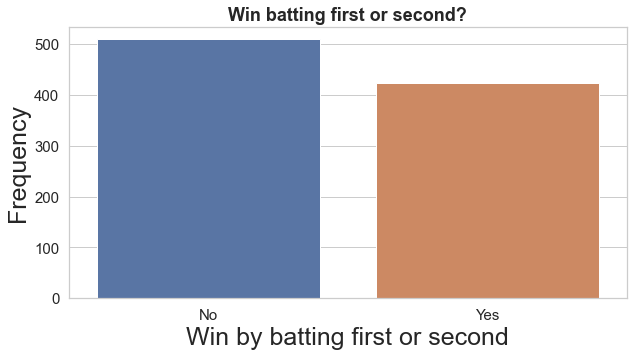

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='win_batting_first', data = new_matches)
plt.title("Win batting first or second?",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Win by batting first or second", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

  * Teams batting second have won **54% times.**

### 5.1.8 Does winning toss help in winning matches?

In [54]:
matches['toss_win_game_win'] = np.where((matches.TossWinner == matches.WinningTeam),'Yes','No')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Result,win_by_runs,win_by_wickets,toss_win_game_win
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Normal,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,normal,0,7,No
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Normal,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,normal,0,7,Yes
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,...,Normal,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,normal,14,0,No
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,...,Normal,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,normal,0,7,Yes
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,...,Normal,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,normal,0,5,No


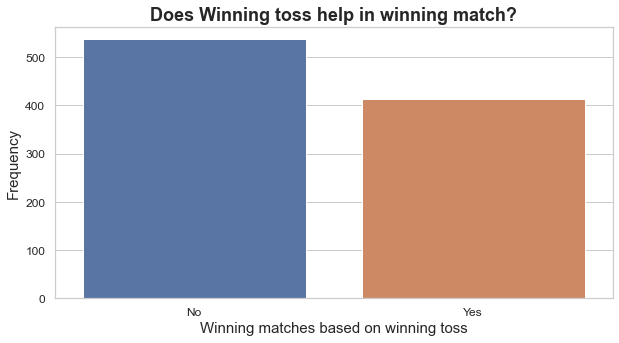

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='toss_win_game_win', data=matches)
plt.title("Does Winning toss help in winning match?", fontsize=18, fontweight="bold")
plt.ylabel("Frequency", size=15)
plt.xlabel("Winning matches based on winning toss", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


  * Teams winning tosses have loose slightly more number of matches

### 5.1.9 Which player's performance has mostly led to his team's win?

In [56]:
#MoM awards
MoM = pd.DataFrame(matches.Player_of_Match.value_counts())
MoM.head()

,Player_of_Match
AB de Villiers,25
CH Gayle,22
DA Warner,18
RG Sharma,18
MS Dhoni,17


Text(0.5, 0, 'Players')

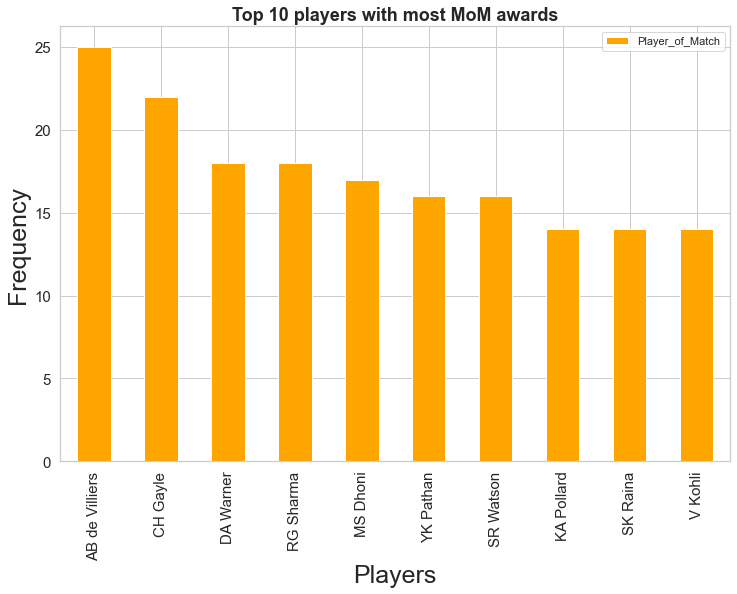

In [57]:
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='orange')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

  * **AB de Villiers** has so far won the most number of MoM awards followed by **CH Gayle.**


### 5.1.10 Has AB de Villiers won MoM awards consistently across all venues or does he have a skewed distribution towards any particular venue?

In [58]:
AB_de_Villiers = matches[matches['Player_of_Match']== 'AB de Villiers'][['Player_of_Match','Season','Venue','City']]
AB_de_Villiers.groupby('Venue')['Player_of_Match'].value_counts().sort_values(ascending = False)

Venue                                       Player_of_Match
M Chinnaswamy Stadium                       AB de Villiers     9
Dubai International Cricket Stadium         AB de Villiers     2
Maharashtra Cricket Association Stadium     AB de Villiers     2
Arun Jaitley Stadium, Delhi                 AB de Villiers     1
JSCA International Stadium Complex          AB de Villiers     1
Kingsmead                                   AB de Villiers     1
MA Chidambaram Stadium, Chepauk             AB de Villiers     1
Narendra Modi Stadium, Ahmedabad            AB de Villiers     1
Nehru Stadium                               AB de Villiers     1
OUTsurance Oval                             AB de Villiers     1
Punjab Cricket Association Stadium, Mohali  AB de Villiers     1
Sawai Mansingh Stadium                      AB de Villiers     1
Sharjah Cricket Stadium                     AB de Villiers     1
Subrata Roy Sahara Stadium                  AB de Villiers     1
Wankhede Stadium              

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10')])

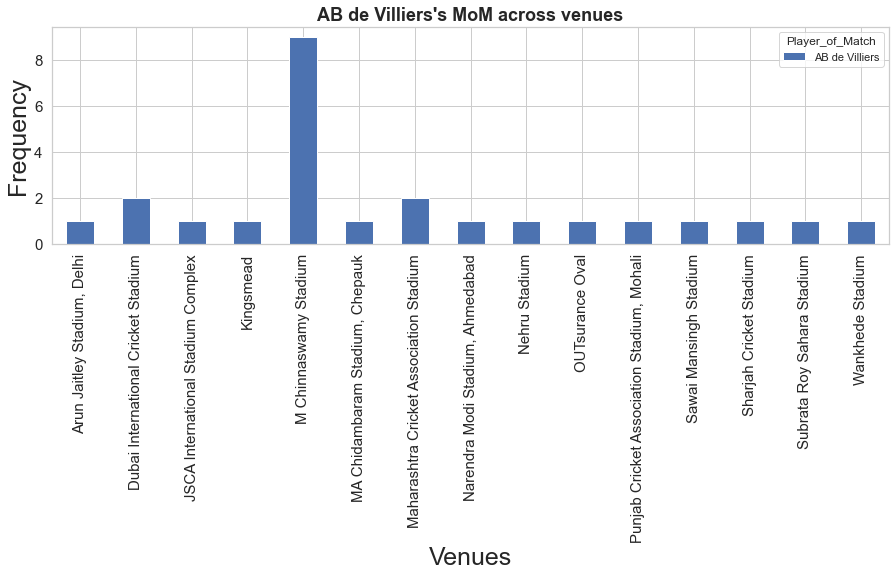

In [59]:
AB_de_Villiers.groupby('Venue')['Player_of_Match'].value_counts().unstack().plot(kind = 'bar', stacked = False, 
                                                                          figsize =(15,4),fontsize =15)
plt.title("AB de Villiers's MoM across venues",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Venues", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

  * AB de Villiers has won MoM most in Bengaluru. This is mainly because he played for this franschise for the longest timeperiod.

# 5.2 Bivariate Analysis on Matches Data

Here we are doing bivariate analysis on matches data, deliveries data as well as merged data

### 5.2.1 Do teams bat first or second after winning toss?

Text(0, 0.5, 'Count')

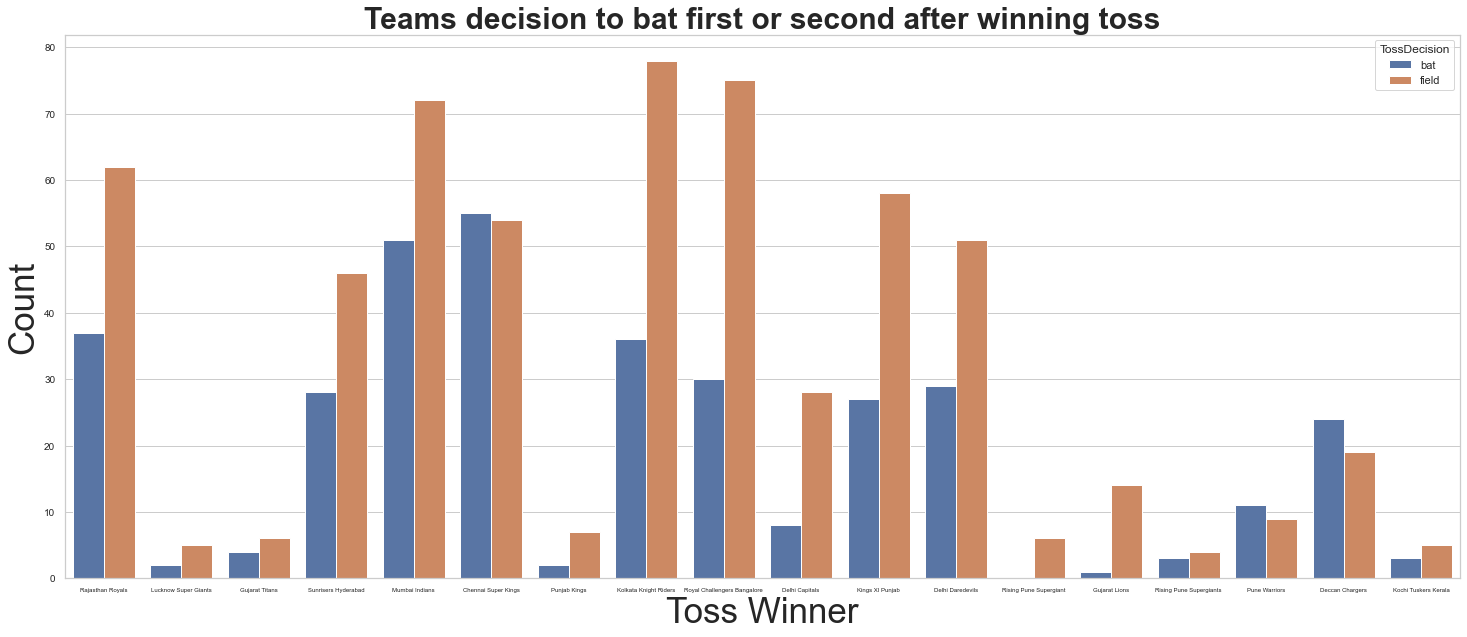

In [60]:
plt.figure(figsize = (25,10))
sns.countplot(x='TossWinner', data = matches, hue = 'TossDecision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 6)
plt.yticks(size = 10)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

  * Most teams field first after winning toss except for Chennai Super Kings who has mostly opted to bat first. Deccan Chargers and Pune Warriors also show the same trend.

### 5.2.2 How toss decision affects match results?

Text(0, 0.5, 'Frequency')

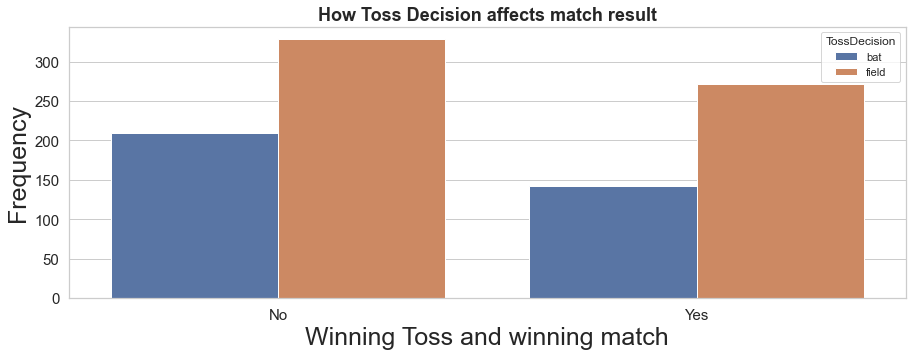

In [61]:
plt.figure(figsize = (15,5))
sns.countplot(x='toss_win_game_win', data=matches, hue = 'TossDecision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

  * Teams winning tosses and electng to field first have won most number of times.

In [62]:
pd.crosstab(matches.toss_win_game_win, matches.TossDecision)

TossDecision,bat,field
toss_win_game_win,,
No,209,328
Yes,142,271


### 5.2.3 Does winning matches by fielding first vary across venues or it is universally true for all venues?

Text(0, 0.5, 'Venue')

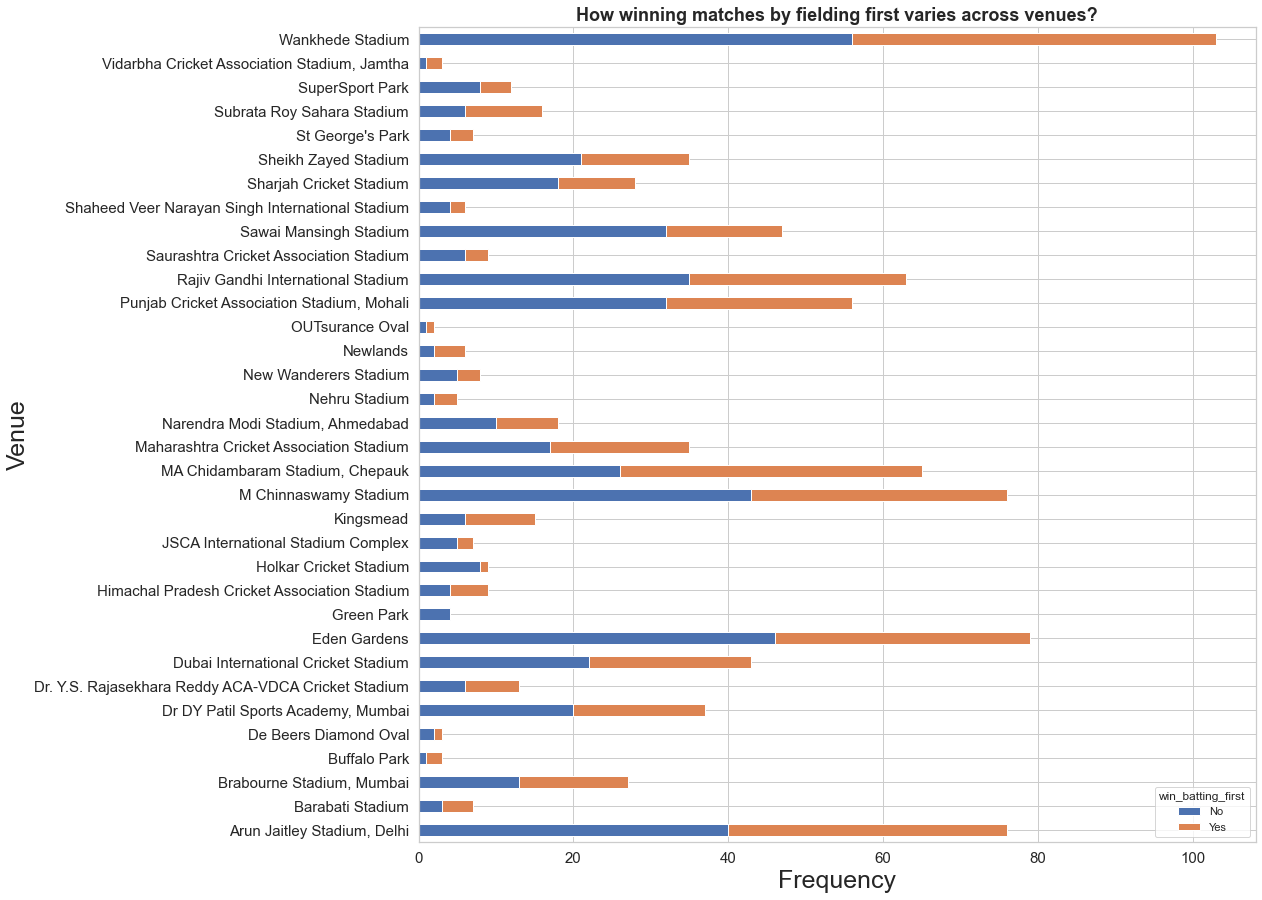

In [63]:
new_matches.groupby('Venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency", fontsize = 25)
plt.ylabel("Venue", fontsize = 25)

  * Batting second has been more rewarding in almost all the venues

### 5.2.4 Is batting second advantageous aross all years?

Text(0, 0.5, 'Count')

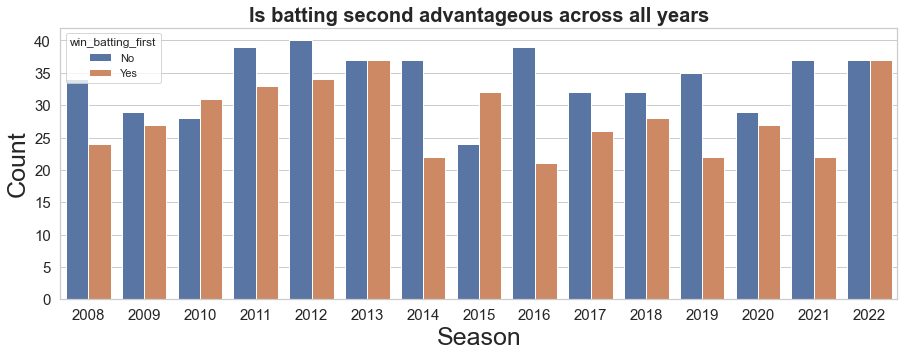

In [64]:
plt.figure(figsize = (15,5))
sns.countplot(x='Season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantageous across all years", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 25)
plt.ylabel("Count", fontsize = 25)

  * Except for 2010 and 2015, in all other years it can be seen that teams batting second have won more matches.In 2022 it is equal

### 5.2.5 Which team has defended handsomely after winning toss i.e. won by big margins?

In [65]:
#In order to answer this question we first need to plot the distribution win_by_runs column

Text(0, 0.5, 'Frequency')

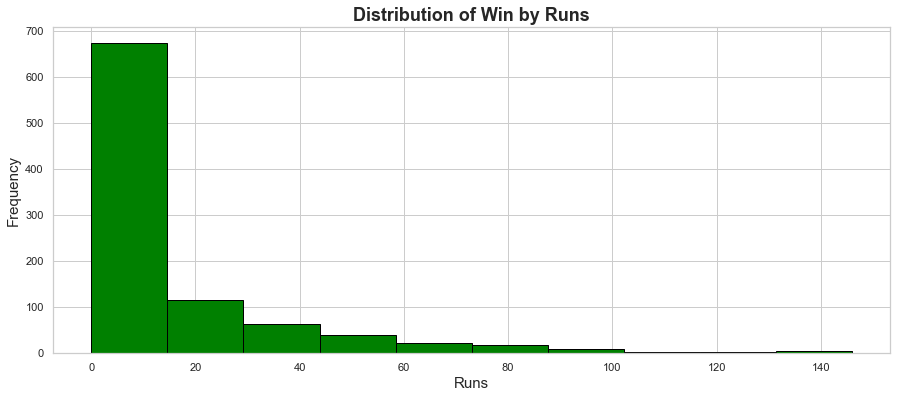

In [66]:
matches.win_by_runs.plot(kind = 'hist', edgecolor = 'black', figsize =(15,6), color = 'green') #right skewed
plt.title("Distribution of Win by Runs",fontsize= 18, fontweight = 'bold')
plt.xlabel("Runs", size = 15)
plt.ylabel("Frequency", size = 15)

#for a T20 match anything above 40 runs is quite a big win margin

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

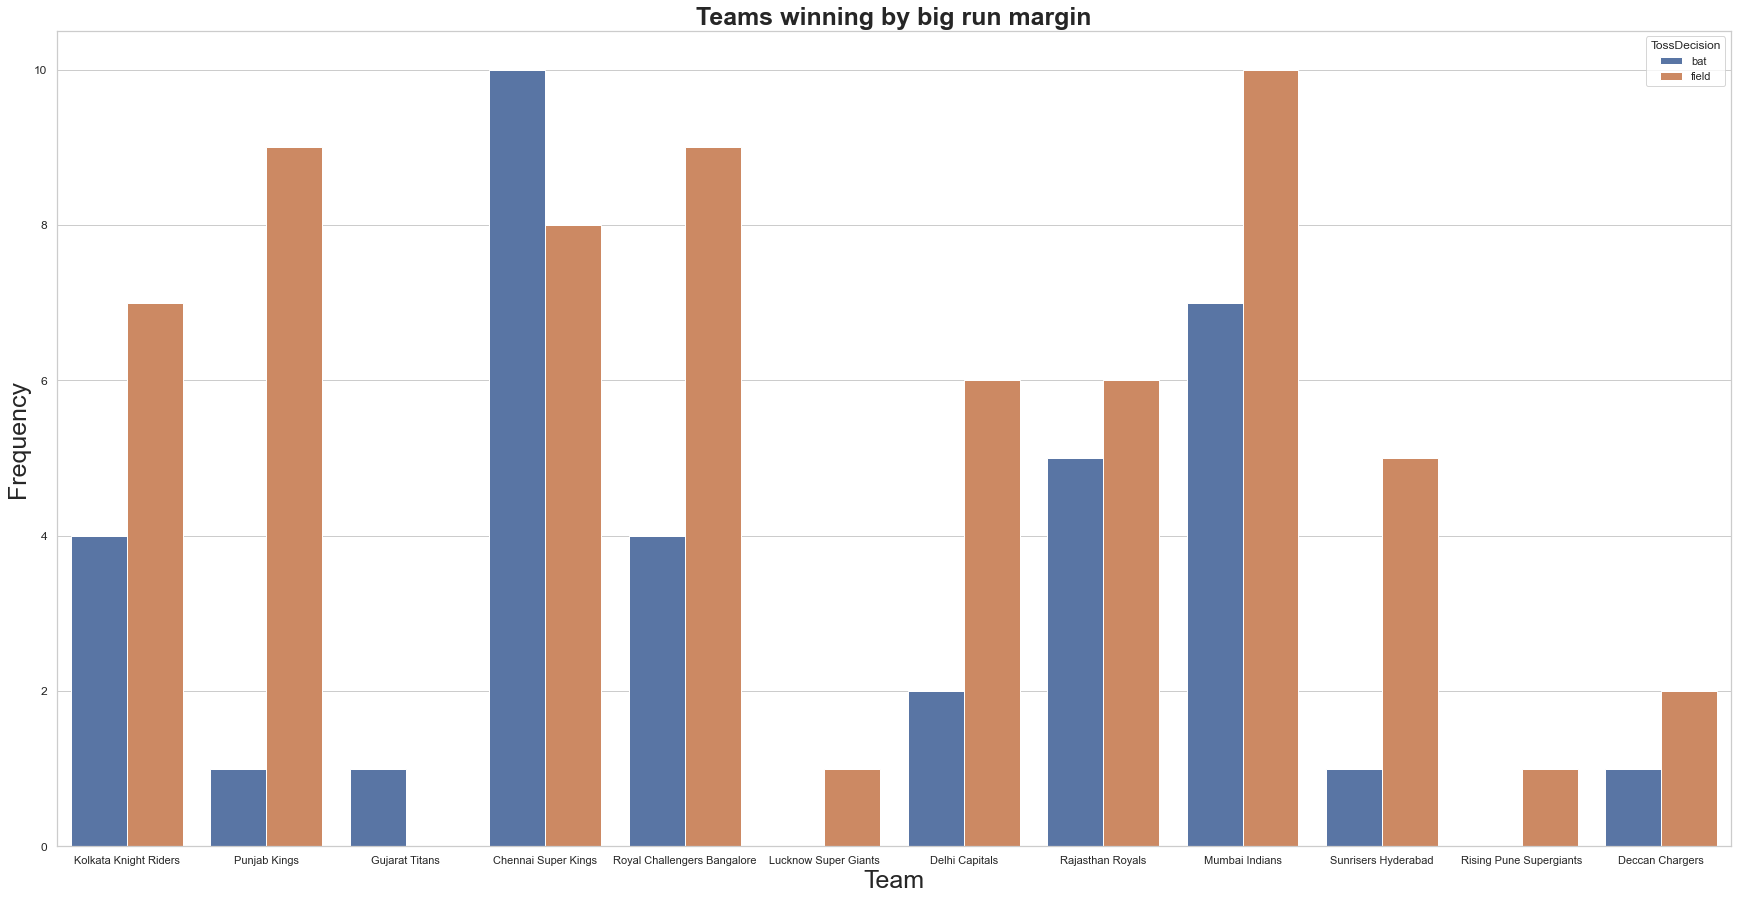

In [67]:
#Teams which have won matches by more than say 42 runs
big_run_margin = pd.DataFrame(matches[matches.win_by_runs > 42][['WinningTeam','TossWinner','TossDecision']])
plt.figure(figsize=(30,15))
sns.countplot(x='WinningTeam', data = big_run_margin, hue = 'TossDecision')
plt.title("Teams winning by big run margin",fontsize= 25, fontweight = 'bold')
plt.xlabel("Team", size = 25)
plt.ylabel("Frequency", size = 25)
plt.xticks(size = 11)
plt.yticks(size = 12)

  * CSK has beaten opponents most number of times by big run margin. Also CSK has mostly decided to bat first after winning toss which explains their winning by runs phenomenon


### 5.2.6 Which team has chased down totals successfully with good number of wickets left at hand?

In [68]:
#In order to answer this question we first need to plot the distribution win_by_wickets column

Text(0, 0.5, 'Frequency')

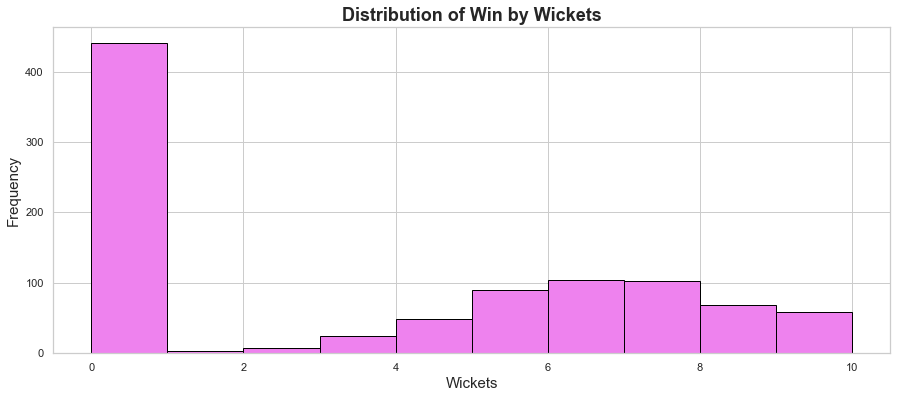

In [69]:
matches.win_by_wickets.plot(kind = 'hist', edgecolor = 'black', figsize =(15,6), color = 'violet') #right skewed
plt.title("Distribution of Win by Wickets",fontsize= 18, fontweight = 'bold')
plt.xlabel("Wickets", size = 15)
plt.ylabel("Frequency", size = 15)

#Winning with more than 5 wickets remaining is quite good in t20 matches

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35')])

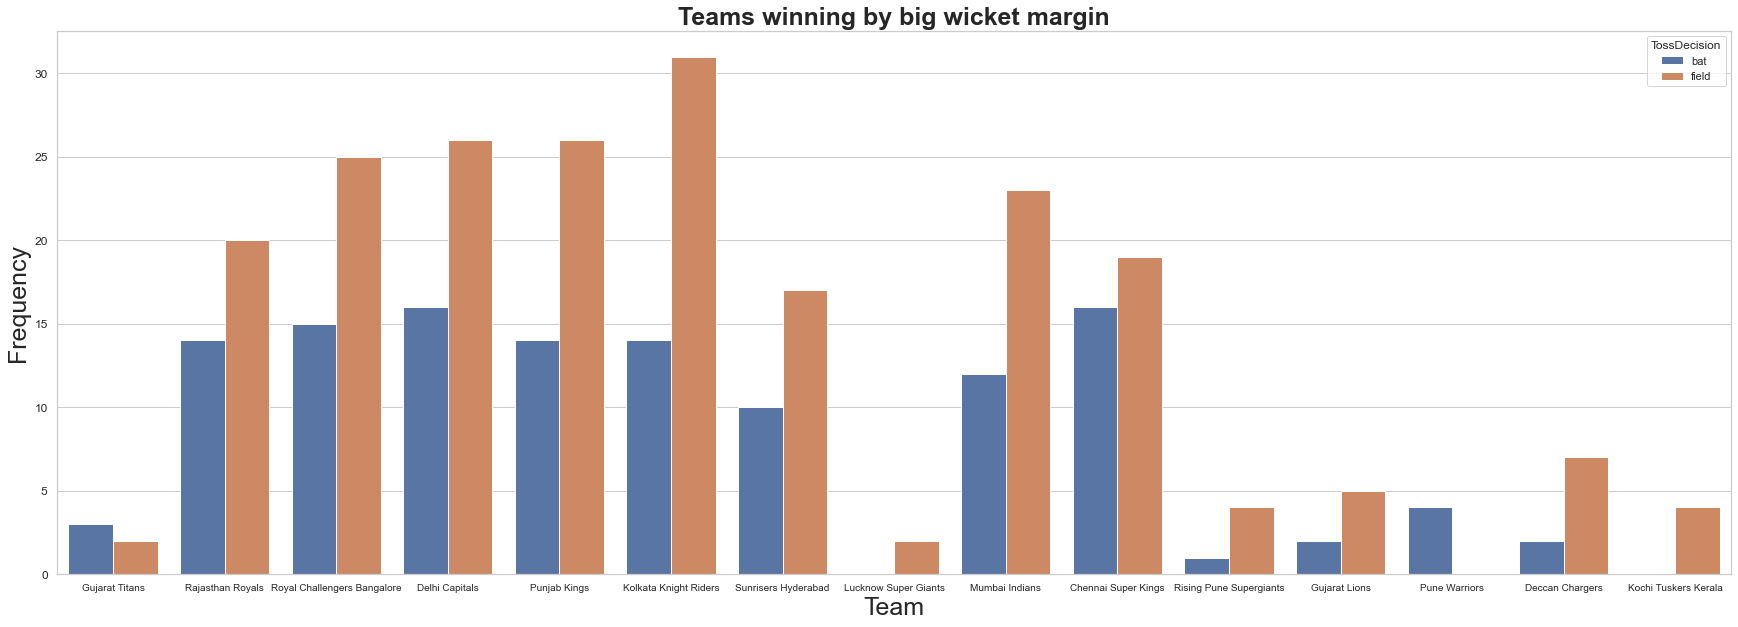

In [70]:
#Teams which have won matches by more than 5 wickets
big_wicket_margin = pd.DataFrame(matches[matches.win_by_wickets > 5][['WinningTeam','TossWinner','TossDecision']])
plt.figure(figsize=(30,10))
sns.countplot(x='WinningTeam', data = big_wicket_margin, hue='TossDecision')
plt.title("Teams winning by big wicket margin",fontsize= 25, fontweight = 'bold')
plt.xlabel("Team", size = 25)
plt.ylabel("Frequency", size = 25)
plt.xticks(size = 10)
plt.yticks(size = 12)

  * KKR, Punjab kings, Delhi capitals and RCB have won by good wicket margins over the years and they have all decided to field first after winning toss

## We will now use the merged data frame to gain more insghts - this time it will be based more on individual players

# 5.3 Univariate Analysis based on Merged Data

### 5.3.1 Have teams started to score more easily over the years?

(array([14000., 15000., 16000., 17000., 18000., 19000., 20000., 21000.,
        22000., 23000., 24000.]),
 [Text(0, 14000.0, '14000'),
  Text(0, 15000.0, '15000'),
  Text(0, 16000.0, '16000'),
  Text(0, 17000.0, '17000'),
  Text(0, 18000.0, '18000'),
  Text(0, 19000.0, '19000'),
  Text(0, 20000.0, '20000'),
  Text(0, 21000.0, '21000'),
  Text(0, 22000.0, '22000'),
  Text(0, 23000.0, '23000'),
  Text(0, 24000.0, '24000')])

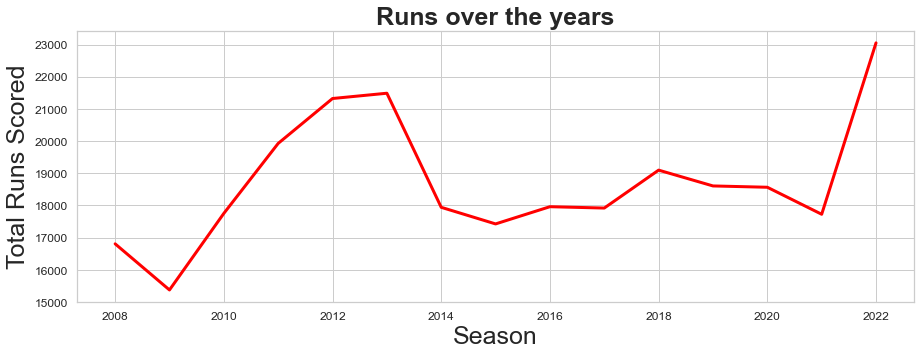

In [71]:
merge_df.groupby('Season')['batsman_run'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'red')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

  * Run scoring has gone up from the start of the IPL in 2008.

### 5.3.2 Is there any pattern between most runs and batting order?

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000')])

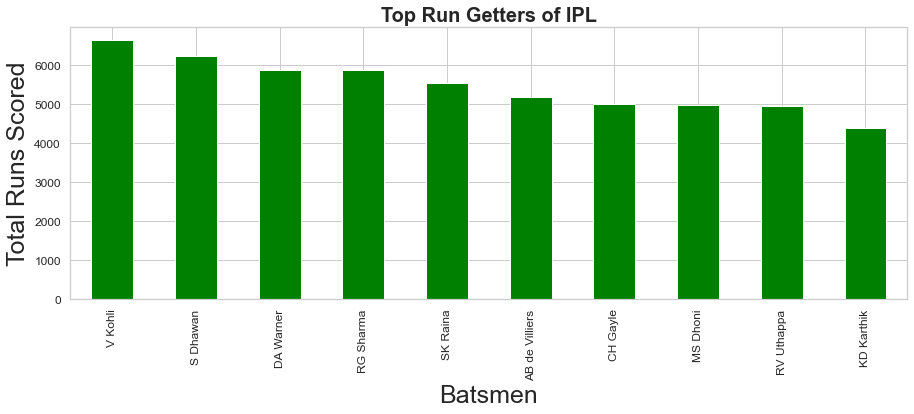

In [72]:
#let's plot the top 10 run getter so far in IPL
merge_df.groupby('batter')['batsman_run'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

  * Except for MS Dhoni, all other top run getters are either openers or come in 3rd or 4th positions to bat
  * **Virat Kohli** is the highest run getter in IPL.

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000')])

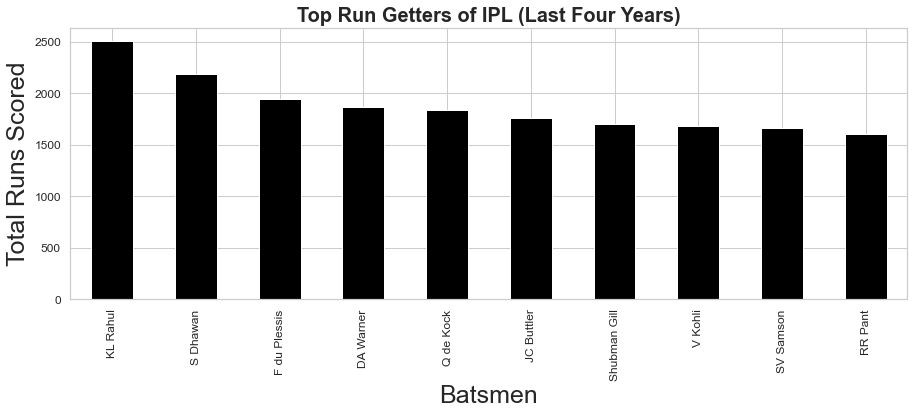

In [73]:


# Filter the DataFrame for the last four years
last_four_years_df = merge_df[merge_df['Season'] >= 2019]

# Group by 'batter' and calculate the sum of 'batsman_run'
batsman_runs = last_four_years_df.groupby('batter')['batsman_run'].sum()

# Sort the values in descending order
top_batsmen = batsman_runs.sort_values(ascending=False).head(10)

# Plot the bar chart
top_batsmen.plot(kind='bar', color='black', figsize=(15, 5))

# Set the title and axis labels
plt.title("Top Run Getters of IPL (Last Four Years)", fontsize=20, fontweight='bold')
plt.xlabel("Batsmen", size=25)
plt.ylabel("Total Runs Scored", size=25)
plt.xticks(size=12)
plt.yticks(size=12)

- **KL Rahul** has been a consistent performer in the last four years, emerging as one of the leading run-getters in the last four years IPL seasons followed by **S Dhawan**, **F du plessis**.

### 5.3.3 In a batsman dominated game, which bowlers have performed the best?

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200'),
  Text(0, 225.0, '225')])

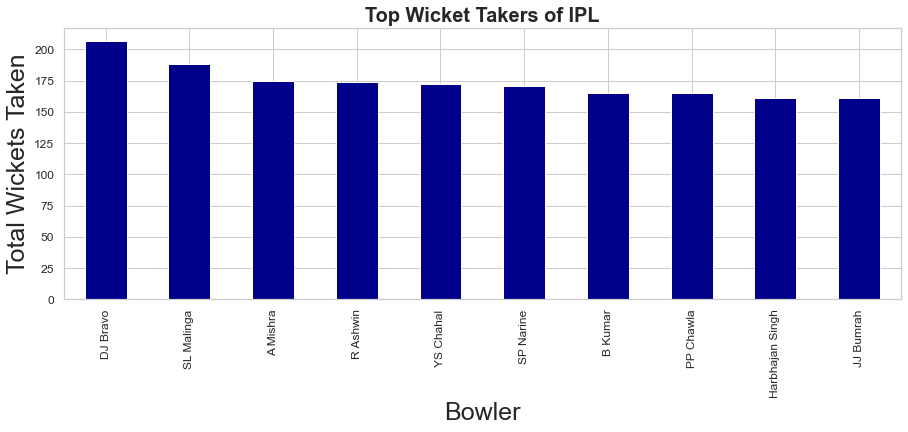

In [74]:
merge_df.groupby('bowler')['player_out'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'darkblue', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

  * **Bravo** has taken the most number of wickets in IPL followed by **Malinga** and **Amit Mishra**
  * In top 10 bowlers, 4 are fast and medium pacers while the other 6 are spinners
  * All 6 spinners are right arm spinners and 3 are leg spinners while 3 are off spinners
  * All 4 pacers are right arm pacers

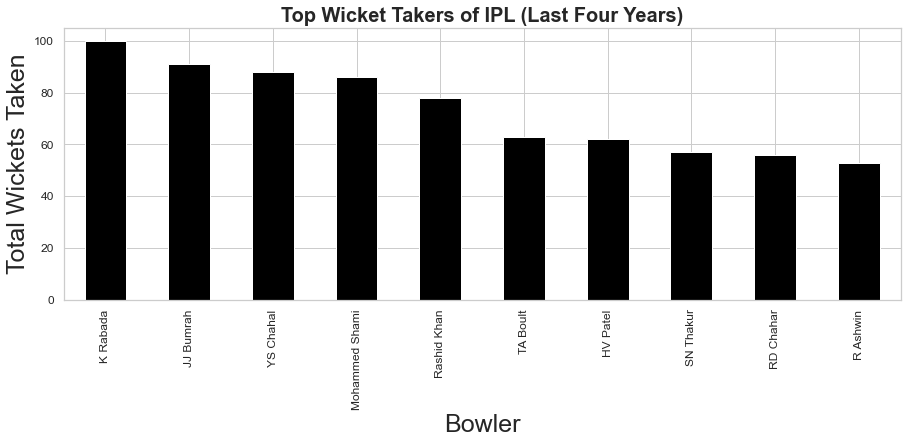

In [75]:

# Filter the DataFrame for the last four years
last_four_years_df_bowler = merge_df[merge_df['Season'] >= 2019]

# Group by 'bowler' and count the occurrences of 'player_out'
bowler_wickets = last_four_years_df_bowler.groupby('bowler')['player_out'].count()

# Sort the values in descending order
top_bowler = bowler_wickets.sort_values(ascending=False).head(10)

# Plot the bar chart
top_bowler.plot(kind='bar', color='Black', figsize=(15, 5))

# Set the title and axis labels
plt.title("Top Wicket Takers of IPL (Last Four Years)", fontsize=20, fontweight='bold')
plt.xlabel("Bowler", size=25)
plt.ylabel("Total Wickets Taken", size=25)
plt.xticks(size=12)
plt.yticks(size=12)

# Display the chart
plt.show()


- **K Rabada** has been a consistent performer in the last four years, emerging as one of the leading Wicket takers in the last four years IPL seasons followed by **Bumrah** and **Chahal**.

# 5.4 Bivariate Analysis based on Merged Data

### 5.4.1 Runs scored by all the teams across seasons

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000'),
  Text(0, 40000.0, '40000')])

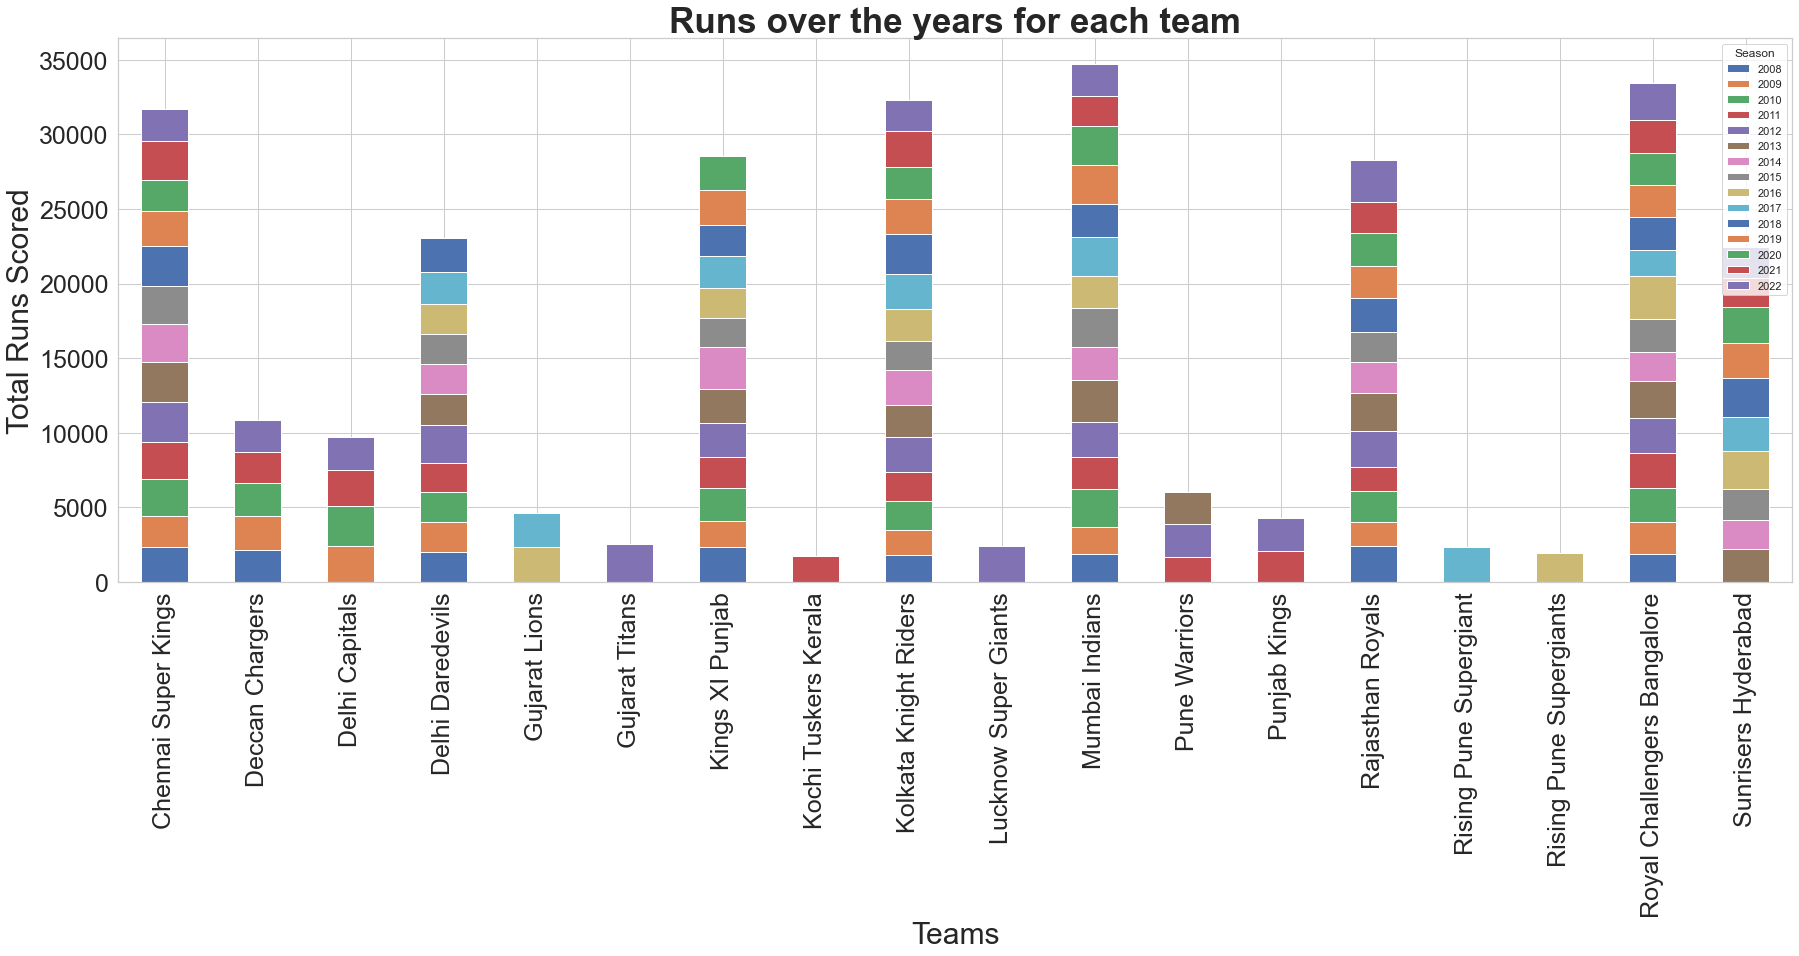

In [76]:
merge_df.groupby(['BattingTeam','Season'])['batsman_run'].sum().unstack().plot(kind = 'bar',stacked = True ,
                                                                                figsize = (30,10))
plt.title("Runs over the years for each team",fontsize= 35, fontweight = 'bold')
plt.xlabel("Teams", size = 30)
plt.ylabel("Total Runs Scored", size = 30)
plt.xticks(size = 25)
plt.yticks(size = 25)

Over the years run scoring has gone up for all teams.

### 5.4.2 Which batsman has been most consistent among top 10 run getters?

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

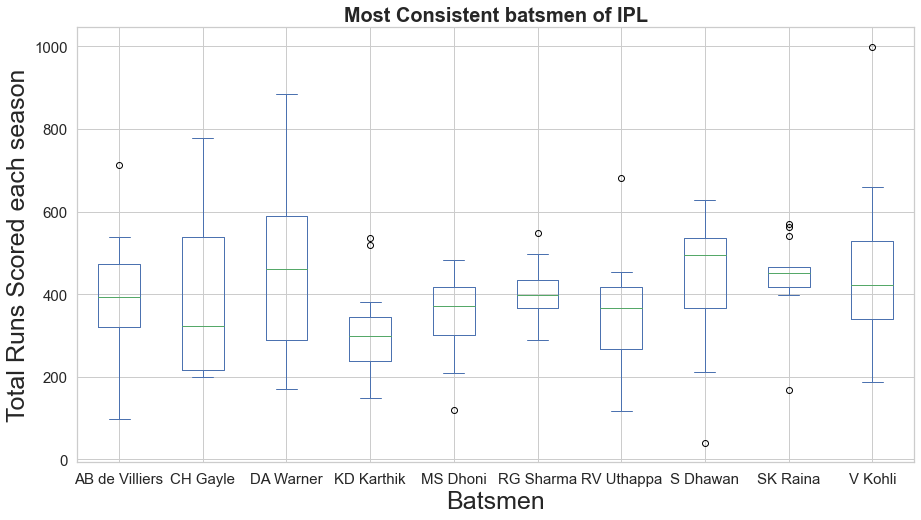

In [77]:
consistent_batsman = merge_df[merge_df.batter.isin(['SK Raina', 'V Kohli','RG Sharma','KD Karthik',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batter','Season','total_run']]

consistent_batsman.groupby(['Season','batter'])['total_run'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

  * Median score for **S Dhawan** is above all the top 10 run getters. He has the highest lowest run among all the batsmen across 15 seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.

### 5.4.3 Batsmen who have maintained a healthy average over the years?

In [78]:
#We will consider players who have played 14 to 15 seasons

In [79]:
#Players with highest batting average in IPL who have played 14 to 15 seasons?
no_of_matches = pd.DataFrame(merge_df.groupby('batter')['ID'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df.groupby('batter')['batsman_run'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df.groupby('batter')['Season'].nunique()) #season = 1 implies played only 1 season

batsman_df = pd.DataFrame({'ID':no_of_matches['ID'],'total_run':runs['batsman_run'],'Season':seasons['Season']})
batsman_df.reset_index(inplace = True)

batsman_df['batting_average'] = batsman_df['total_run']/batsman_df['ID']
highest_avg = batsman_df[batsman_df['Season'].isin([14,15])][['Season','batter','batting_average']].sort_values(by = 'batting_average',
                                                                                        ascending = False).head(10)

highest_avg

,Season,batter,batting_average
569,15,V Kohli,30.855814
27,14,AB de Villiers,30.476471
462,15,S Dhawan,30.458537
46,14,AM Rahane,27.527027
430,15,RG Sharma,26.610860
452,15,RV Uthappa,25.147208
328,15,MK Pandey,24.709459
339,15,MS Dhoni,24.282927
256,15,KD Karthik,21.144928
587,15,WP Saha,20.743590


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35')])

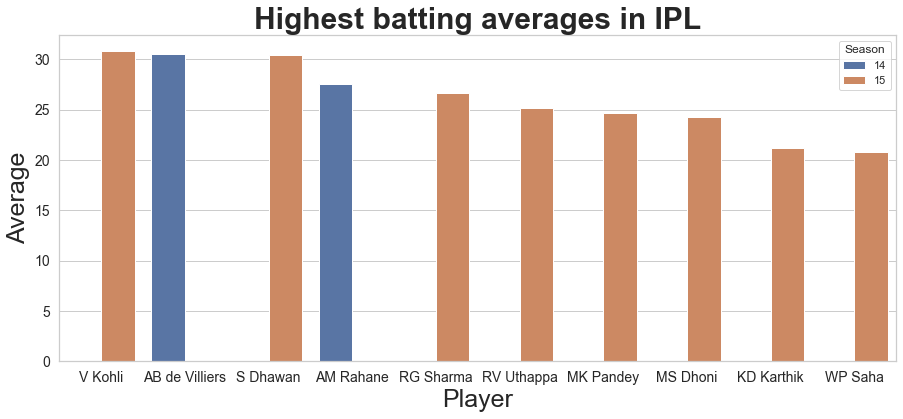

In [80]:
plt.figure(figsize = (15,6))
sns.barplot(x='batter', y='batting_average', data = highest_avg, hue = 'Season')
plt.title("Highest batting averages in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Average", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

  * **V Kohli** has the highest average followed by **AB de Villiers and S Dhawan**
  * Rahane, MK Pandey and Saha might not be in the top 10 run getters but have mainted a good average over the years.

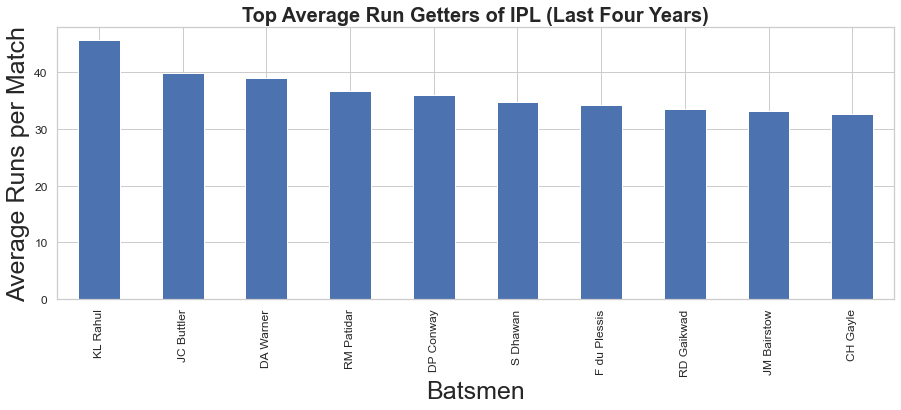

In [81]:
# Filter the DataFrame for the last four years
last_four_years_df = merge_df[merge_df['Season'] >= 2019]

# Group by 'batter' and calculate the sum of 'batsman_run'
batsman_runs = last_four_years_df.groupby('batter')['batsman_run'].sum()

# Calculate the number of matches played by each batter
matches_played = last_four_years_df.groupby('batter')['ID'].nunique()

# Calculate the average runs per match for each batter
average_runs = batsman_runs / matches_played

# Sort the values in descending order
top_batsmen_avg = average_runs.sort_values(ascending=False).head(10)

# Plot the bar chart
top_batsmen_avg.plot(kind='bar',  figsize=(15, 5))

# Set the title and axis labels
plt.title("Top Average Run Getters of IPL (Last Four Years)", fontsize=20, fontweight='bold')
plt.xlabel("Batsmen", size=25)
plt.ylabel("Average Runs per Match", size=25)
plt.xticks(size=12)
plt.yticks(size=12)

# Display the chart
plt.show()


* **KL Rahul** has the highest average since last 4 seasons followed by **Buttler** and **Warner**


### 5.4.4 Batsmen with the best strike rates over the years

In [82]:
#We will consider players who have played 14 or more seasons

In [83]:
no_of_balls = pd.DataFrame(merge_df.groupby('batter')['ballnumber'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df.groupby('batter')['batsman_run'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df.groupby('batter')['Season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'ballnumber':no_of_balls['ballnumber'],'total_run':runs['batsman_run'],'Season':seasons['Season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['total_run']/batsman_strike_rate['ballnumber']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.Season.isin([14,15])][['Season','batter','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,Season,batter,strike_rate
27,14,AB de Villiers,148.580442
339,15,MS Dhoni,130.931089
256,15,KD Karthik,129.267572
430,15,RG Sharma,126.964594
452,15,RV Uthappa,126.152279
569,15,V Kohli,125.977972
136,14,DJ Bravo,125.100241
587,15,WP Saha,124.397745
462,15,S Dhawan,122.840842
423,14,RA Jadeja,122.108346


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

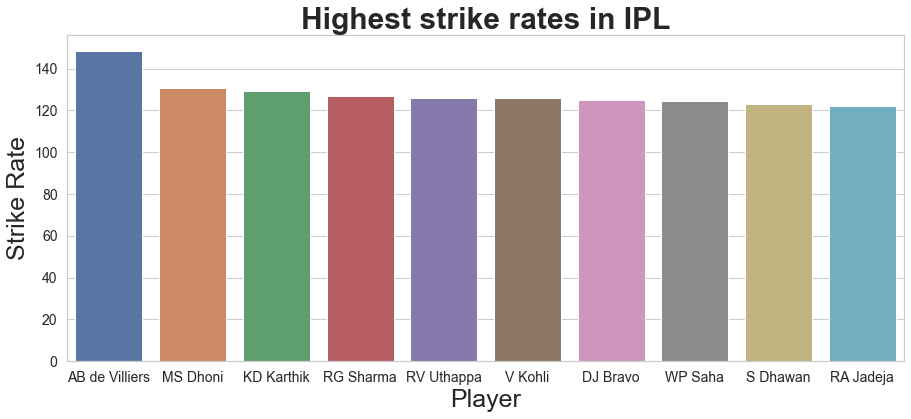

In [84]:
plt.figure(figsize = (15,6))
sns.barplot(x='batter', y='strike_rate', data = highest_strike_rate.head(10))
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

  * **AB de Villiers** has the highest strike rates in IPL followed by **MS Dhoni** and **Karthik.**They are the big hitters and can win any match on their day


In [85]:

no_of_matches = pd.DataFrame(merge_df.groupby('batter')['ID'].nunique()) # Total number of matches played by each batsman
runs = pd.DataFrame(merge_df.groupby('batter')['batsman_run'].sum()) # Total runs scored by each batsman
balls_faced = pd.DataFrame(merge_df.groupby('batter')['ballnumber'].count()) # Total number of balls faced by each batsman

batsman_strike_rate = pd.DataFrame({'matches_played': no_of_matches['ID'], 'total_run': runs['batsman_run'], 'balls_faced': balls_faced['ballnumber']})
batsman_strike_rate.reset_index(inplace=True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['total_run'] / batsman_strike_rate['balls_faced'] * 100

# Filter for the last four seasons
last_four_years_strike_rate = batsman_strike_rate[batsman_strike_rate['matches_played'] >= 10]  # Considering players who have played at least 10 matches in the last four years

# Sort by strike rate in descending order
highest_strike_rate = last_four_years_strike_rate.sort_values(by='strike_rate', ascending=False)

# Select the top 10 batsmen with the highest strike rate
top_10_batsmen = highest_strike_rate.head(10)

# Display the top 10 batsmen with the highest strike rate
top_10_batsmen[['matches_played', 'batter', 'strike_rate']]


,matches_played,batter,strike_rate
36,81,AD Russell,168.234323
260,12,KK Cooper,165.714286
91,17,BCJ Cutting,163.013699
245,20,K Gowtham,161.739130
234,10,JM Sharma,157.046980
292,23,LS Livingstone,155.965909
508,82,SP Narine,154.367470
218,21,JC Archer,152.343750
118,14,CR Brathwaite,150.833333
99,17,Bipul Sharma,150.806452


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

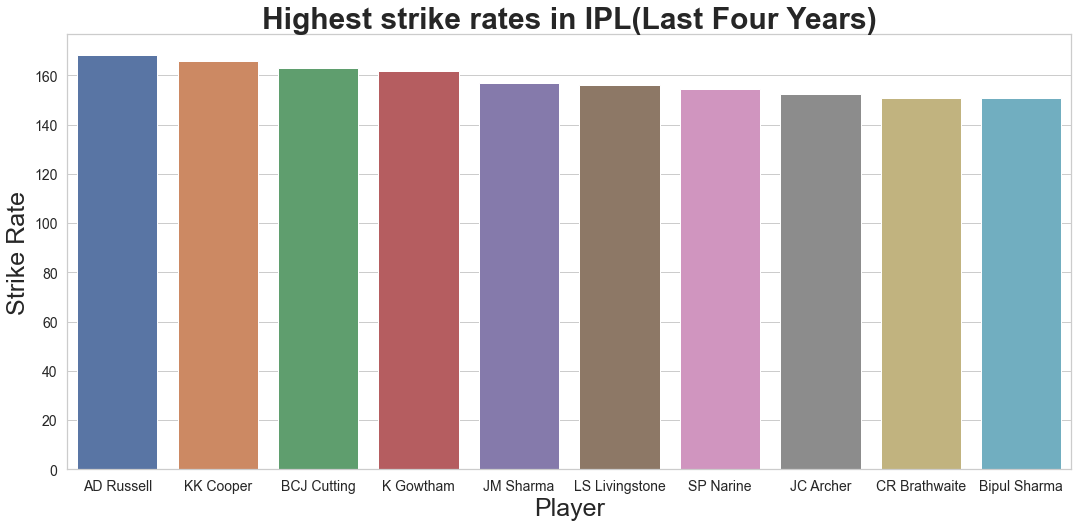

In [86]:
plt.figure(figsize = (18,8))
sns.barplot(x='batter', y='strike_rate', data = top_10_batsmen.head(10))
plt.title("Highest strike rates in IPL(Last Four Years)",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

* **Russell** has the highest strike rates in IPL since last 4 seasons followed by **Cooper** and **Cutting.** 


### 5.4.5 Which bowlers have performed well over last few seasons and can be considered further for upcoming auctions?

In [87]:
#We will consider the bowling average here for bowlers who have taken at least 50 wickets

In [88]:
runs_given = pd.DataFrame(merge_df.groupby('bowler')['batsman_run'].sum())
wickets_taken = pd.DataFrame(merge_df[merge_df['kind'] != 'no dismissal'].groupby('bowler')['kind'].count())
seasons_played = pd.DataFrame(merge_df.groupby('bowler')['Season'].nunique())
bowler_avg = pd.DataFrame({'total_run':runs_given['batsman_run'],'player_out':wickets_taken['kind'],
                          'Season':seasons_played['Season']})
bowler_avg.reset_index(inplace = True)

bowler_avg['player_out'].dropna(axis = 0, inplace = True)

In [89]:
bowler_avg['bowling_average'] = bowler_avg['total_run']/bowler_avg['player_out']
best_bowling_avg = bowler_avg[bowler_avg['player_out'] > 50].sort_values(by = 'bowling_average', ascending = True).head(10)

In [90]:
best_bowling_avg.head(10)

,bowler,total_run,player_out,Season,bowling_average
393,SL Malinga,3194,188,9,16.989362
196,K Rabada,1901,108,5,17.601852
160,Imran Tahir,1664,86,8,19.348837
355,Rashid Khan,2308,119,6,19.394958
148,HV Patel,2121,106,10,20.009434
9,A Nehra,2422,121,9,20.016529
109,DJ Bravo,4178,207,13,20.183575
264,MM Patel,1670,82,7,20.365854
181,JO Holder,1124,55,6,20.436364
288,NM Coulter-Nile,1063,52,8,20.442308


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5')])

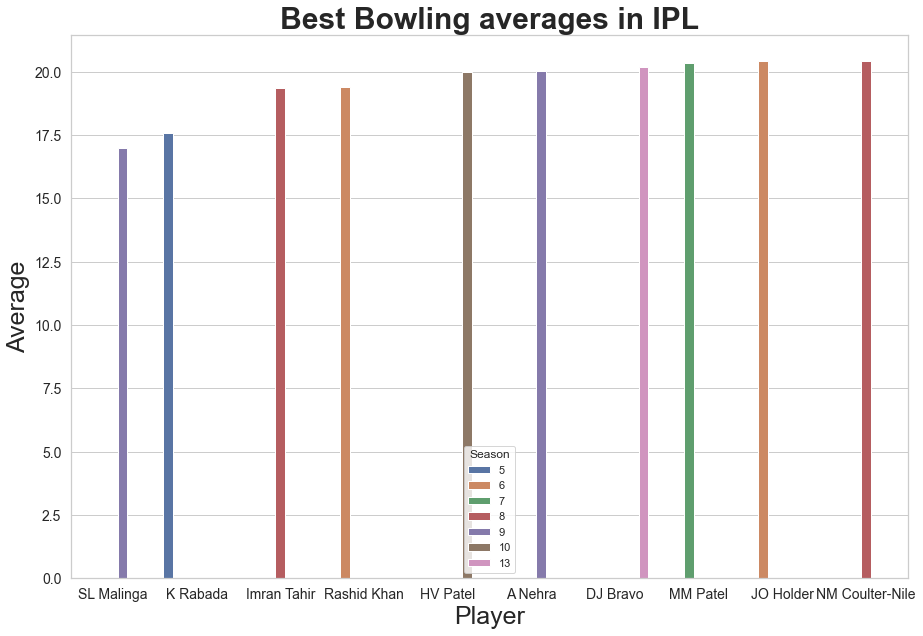

In [91]:
plt.figure(figsize = (15,10))
sns.barplot(x='bowler', y='bowling_average', data = best_bowling_avg, hue = 'Season')
plt.title("Best Bowling averages in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Average", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

  * Bravo has played 13 and above season and hence taken more wickets and improved average
  * Malinga has best average who played above 9 seasons

### 5.4.6 Most Dot Ball by a Bowler

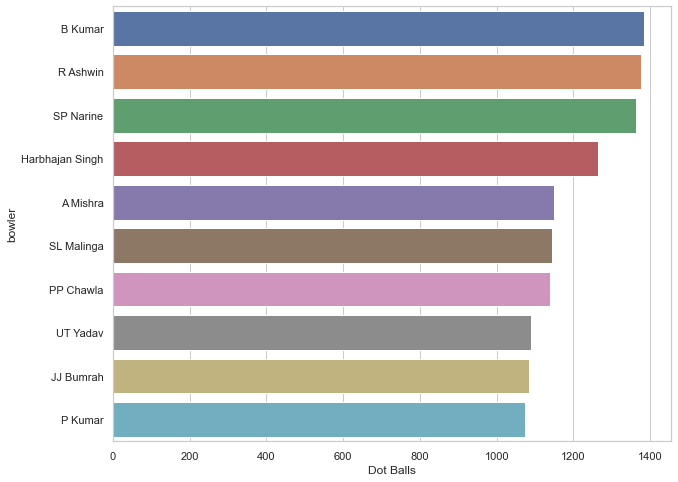

In [92]:
plt.figure(figsize=(10,8))
data = merge_df[merge_df['total_run'] == 0].groupby('bowler').count()['ID'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

  * The Indian bowler **Bhubaneshwar Kumar** has bowled the most number of Dot balls followed by Ashwin.

### 5.4.7 Which bowlers have maintained best economy rates over the years?

In [93]:
runs_given = pd.DataFrame(merge_df.groupby('bowler')['batsman_run'].sum())
balls_bowled = pd.DataFrame(merge_df.groupby('bowler')['ballnumber'].count())
overs_bowled = balls_bowled['ballnumber']/6
wickets_taken = pd.DataFrame(merge_df[merge_df['kind'] != 'no dismissal'].groupby('bowler')['kind'].count())
seasons_played = pd.DataFrame(merge_df.groupby('bowler')['Season'].nunique())
bowler_economy_rate = pd.DataFrame({'runs':runs_given['batsman_run'],'balls':balls_bowled['ballnumber'],'wickets':wickets_taken['kind'],
                          'season':seasons_played['Season'],'overs':overs_bowled})
bowler_economy_rate.reset_index(inplace = True)

In [94]:
#Best economy rates for bowlers who have played at least 5 seasons
bowler_economy_rate['economy_rate'] = bowler_economy_rate['runs']/bowler_economy_rate['overs']
best_economy_rate = bowler_economy_rate[bowler_economy_rate.season >= 5].sort_values(by = 'economy_rate', ascending = True)

In [95]:
best_economy_rate.head(10)

,bowler,runs,balls,wickets,season,overs,economy_rate
355,Rashid Khan,2308,2232,119,6,372.000000,6.204301
242,M Muralitharan,1642,1581,67,7,263.500000,6.231499
128,DW Steyn,2406,2282,105,11,380.333333,6.326030
342,RN ten Doeschate,88,83,3,5,13.833333,6.361446
401,SP Narine,3755,3516,171,11,586.000000,6.407850
337,RE van der Merwe,486,455,25,5,75.833333,6.408791
393,SL Malinga,3194,2974,188,9,495.666667,6.443847
317,R Ashwin,4387,4024,174,13,670.666667,6.541252
263,MM Ali,617,564,29,5,94.000000,6.563830
166,J Yadav,411,374,9,6,62.333333,6.593583


  * **Rashid Khan** has the best economy rate in IPL followed by M Muralitharan
  * **Narine** has bowled 586 overs and maintained a very impressive economy of 6.40
  * Among spinners who are still active, Rashid khan and Narine has the best economy of 6.20 and 6.40 rsepectively

### 5.4.8 Is there a pattern between extras provided by pacers and spinners?

In [96]:
wides = merge_df.loc[merge_df['extra_type'] == 'wides'].groupby('bowler')['extra_type'].count()
noballs = merge_df.loc[merge_df['extra_type'] == 'noballs'].groupby('bowler')['extra_type'].count()
season = pd.DataFrame(merge_df.groupby('bowler')['Season'].nunique())

extras_by_bowlers = pd.DataFrame({'wides': wides, 'no_balls': noballs})
extras_by_bowlers.reset_index(inplace=True)


In [97]:
extras_by_bowlers['total_extras'] = extras_by_bowlers['wides'] + extras_by_bowlers['no_balls']
most_extras = extras_by_bowlers.sort_values(by='total_extras', ascending = False).head(15)

In [98]:
most_extras.head(10)

,bowler,wides,no_balls,total_extras
90,DJ Bravo,167.0,9.0,176.0
336,SL Malinga,128.0,18.0,146.0
374,UT Yadav,105.0,23.0,128.0
272,R Ashwin,120.0,4.0,124.0
52,B Kumar,111.0,11.0,122.0
255,P Kumar,112.0,1.0,113.0
345,SR Watson,95.0,13.0,108.0
342,SN Thakur,95.0,5.0,100.0
106,DW Steyn,93.0,7.0,100.0
295,RP Singh,86.0,13.0,99.0


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

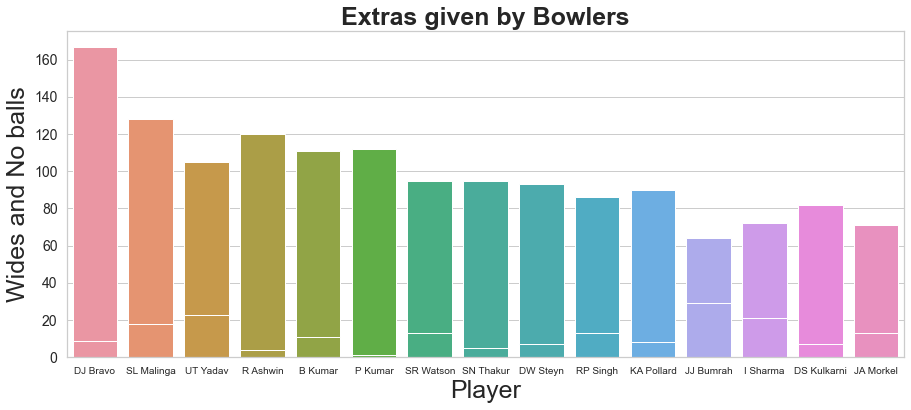

In [99]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'bowler', y = 'wides', data = most_extras)
sns.barplot(x = 'bowler', y = 'no_balls', data = most_extras)
plt.title("Extras given by Bowlers",fontsize= 25, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Wides and No balls", size = 25)
plt.xticks(size = 10)
plt.yticks(size = 14)

  * DJ Bravo has given away most extras
  * Top 10 in this list 9 are pacers and 1 is spinner.
  * Among bowlers with most extras, Umesh Yadav and Malinga have given away most number of extras as no balls
  * Spinners generally do not give away many extra runs
  * Ashwin are the only spinners in top 20 to give away most runs as extras

In [100]:
top_noballs_bowlers = merge_df[merge_df['extra_type'] == 'noballs']['bowler'].value_counts().nlargest(5)
top_noballs_bowlers

JJ Bumrah      29
S Sreesanth    23
UT Yadav       23
A Mishra       21
I Sharma       21
Name: bowler, dtype: int64

  * Amit Mishra is the only spinner in top 20 who has bowled most number of no balls in IPL. He has overstepped a lot more times than any other spinner.Bumrah bowled most number of no balls in IPL

### 5.4.8 Most run given by a team in Extras.

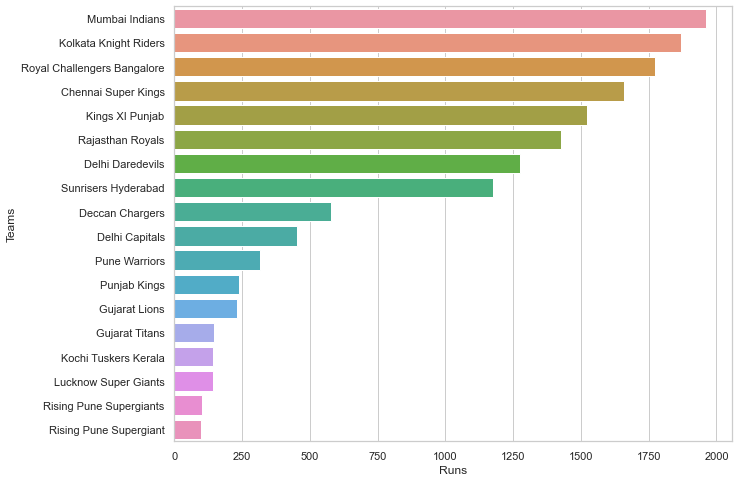

In [101]:
plt.figure(figsize=(10,8))
data = merge_df.groupby(['BattingTeam'])['extras_run'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

  * Mumbai Indians have given the most number of extras

# 6. Conclusion

  * Most teams decide to chase down totals after winning toss except for CSK which goes well with the fact that the have won most games (by good margin) by defending
  * 54% times teams who have chased irrespective of winning or losing toss have won matches. But teams winning tosses and electing to field first have won most number of times. It has been uniform across all venues. Particularly KKR, Punjab Kings, DD and RCB have won by big wicket margin
  * MoM awards have mostly been received by batsmen implying t20 is a more batsmen-oriented game. Venues like Chinnaswamy,Wankhede, MCA, Mohali, Chepauk have been more batsman-friendly than others
  * Mostly the top run getters have been openers or 1st or 2nd down batsmen except for MS Dhoni. That's becuase he has played a lot of matches
  * S Dhawan has been most consistent batsmen among top run getters while AB has had the highest strike rate among all players who have played 10 or more seasons
  * Virat Kohli has had the best average of 30.85 among all batsmen with more than 14 seasons under their belt.
  * Rahane, Manish Pandey are not in top 10 run getters but have maintained a good average across the seasons
  * Bravo has been the most impressive bowler in IPL with more than 207 wickets and average 20.8
  * Bhubaneshwar Kumar has bowled the most number of Dot balls around 1400
  * Among spinners, Rashid Khan has performed quite well  with an bowling average of 19.39 and economy of 6.20
  * Spinners generally do not give away many extra runs and all bowlers in top 10 of that list are pacers.
  * Amit Mishra is the only spinner in top 20 who has overstepped most number of times (21 no balls). He is fourth in the list of bowlers with most number of no balls after Bumrah, Sreesanth, Umesh Yadav.

# 6.1 Actionable Insights

  * Win toss and field first so as to win more matches irrespective of venues.

  * During auctions, if franchise is looking for a consistent batsman, they can go for Shikhar Dhawan.David Warner is also a good choise.

  * Go for ABD, Ms Dhoni,Rohit Sharma, D karthik if looking for the big hitters who can also score a lot of runs

  * ABD can be good catch as he has scored a lot of runs and maintained a very high strike rate of close to 150 over so many years.

  * If franchise is looking for a consistent bowler who can get you wickets and also not give away too many runs then Bravo could be a good option. The only concern is that he gives away too many extras.
  * If team wants to stop leakage of runs then Bhubaneshwar Kumar and ashwin can be a good option as they bowled most numbers of dot balls.
  * Rashid Khan can be an equally good option as he has been the most impressive spinner in seasons with a good bowling average and healthy economy.